# **Redes neuronales artificiales**
(MLP = multilayer perceptron)


In [1]:
!pip install pydot pydotplus graphviz

# Importar las bibliotecas necesarias
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import plot_model

In [2]:

# Cargar el conjunto de datos de cáncer de mama
data = load_breast_cancer()

# Obtener las características y las etiquetas
X = data['data']
y = data['target']

# Normalizar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de red neuronal
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8,  activation='relu'),
    Dense(10,  activation='relu'),
    Dense(16,  activation='relu'),
    Dense(8,  activation='relu'),
    Dense(1,  activation='sigmoid')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 10)                90        
                                                                 
 dense_3 (Dense)             (None, 16)                176       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1043 (4.07 KB)
Trainable params: 1043 (4.0

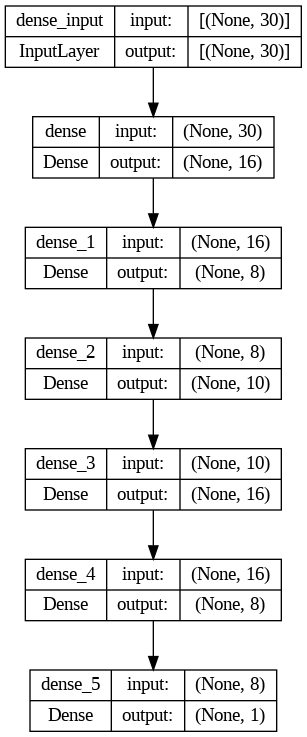

In [3]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [ ]:
# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")


Epoch 1/25
12/12 [==============================] - 3s 35ms/step - loss: 0.7077 - accuracy: 0.3984 - val_loss: 0.6743 - val_accuracy: 0.5055
Epoch 2/25
12/12 [==============================] - 0s 11ms/step - loss: 0.6284 - accuracy: 0.6374 - val_loss: 0.6029 - val_accuracy: 0.7582
Epoch 3/25
12/12 [==============================] - 0s 11ms/step - loss: 0.5585 - accuracy: 0.8956 - val_loss: 0.5256 - val_accuracy: 0.9231
Epoch 4/25
12/12 [==============================] - 0s 9ms/step - loss: 0.4695 - accuracy: 0.9286 - val_loss: 0.4302 - val_accuracy: 0.9231
Epoch 5/25
12/12 [==============================] - 0s 8ms/step - loss: 0.3699 - accuracy: 0.9396 - val_loss: 0.3308 - val_accuracy: 0.9231
Epoch 6/25
12/12 [==============================] - 0s 9ms/step - loss: 0.2749 - accuracy: 0.9451 - val_loss: 0.2451 - val_accuracy: 0.9231
Epoch 7/25
12/12 [==============================] - 0s 7ms/step - loss: 0.2029 - accuracy: 0.9451 - val_loss: 0.1876 - val_accuracy: 0.9341
Epoch 8/25
12/12 

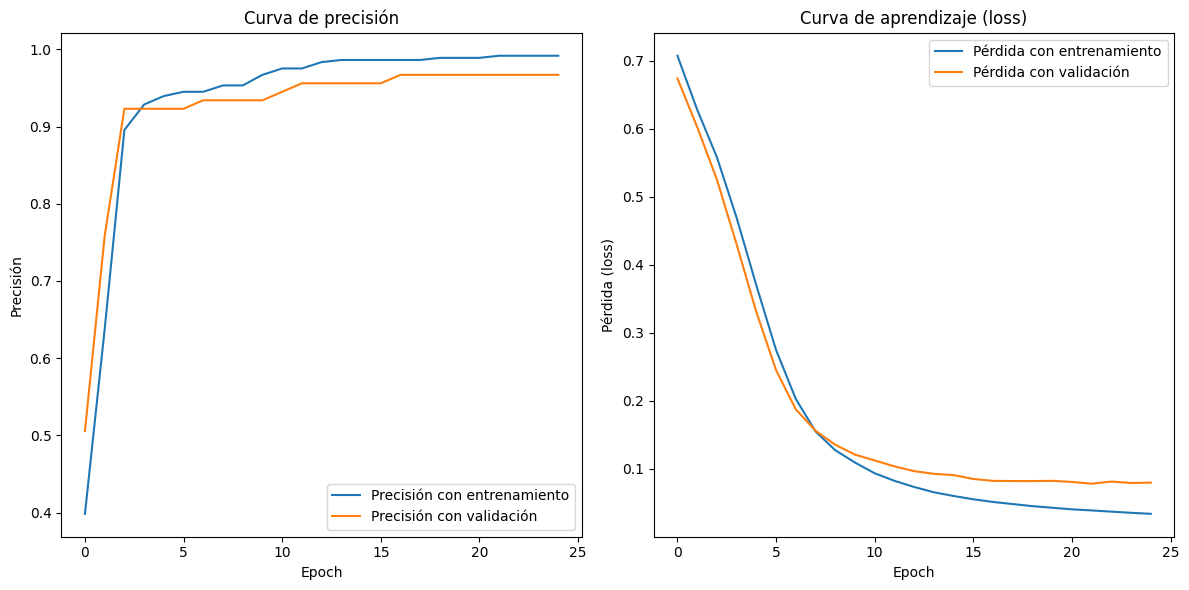

In [ ]:
import matplotlib.pyplot as plt

# Gráficas de las curvas de aprendizaje
plt.figure(figsize=(12, 6))

# Gráfica de la precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión con entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión con validación')
plt.xlabel('Epoch')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curva de precisión')

# Gráfica de la pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida con entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida con validación')
plt.xlabel('Epoch')
plt.ylabel('Pérdida (loss)')
plt.legend()
plt.title('Curva de aprendizaje (loss)')

plt.tight_layout()
plt.show()
